In [2]:
import numpy as np
import datetime as dt
import pandas as pd


In [3]:
import re

def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    return text

In [128]:
import nltk

DML_US_IOS = pd.read_csv(f"data/reviews_DML_US_IOS.csv",sep="\t")
DC_US_IOS = pd.read_csv(f"data/reviews_DC_US_IOS.csv",sep="\t")
DV_US_IOS = pd.read_csv(f"data/reviews_DV_US_IOS.csv",sep="\t")
ML_US_IOS = pd.read_csv(f"data/reviews_ML_US_IOS.csv",sep="\t")

corpus_DML_US_IOS = pd.DataFrame(DML_US_IOS)
corpus_DC_US_IOS = pd.DataFrame(DC_US_IOS)
corpus_DV_US_IOS = pd.DataFrame(DV_US_IOS)
corpus_ML_US_IOS = pd.DataFrame(ML_US_IOS)

corpus_clean_DML_US_IOS = corpus_DML_US_IOS["Content"].apply(nlp_pipeline)
#corpus_clean_DC_US_IOS = corpus_DC_US_IOS["Content"].apply(nlp_pipeline)
corpus_clean_DC_US_IOS = corpus_DC_US_IOS["Content"].dropna().apply(nlp_pipeline)
corpus_clean_DV_US_IOS = corpus_DV_US_IOS["Content"].apply(nlp_pipeline)
corpus_clean_ML_US_IOS = corpus_ML_US_IOS["Content"].apply(nlp_pipeline)

      Country  Rating        Date Version                   Username  \
0          US       5  2023-02-28     NaN                  theekdgod   
1          US       5  2023-02-28     NaN      Pretty good for a kid   
2          US       5  2023-02-28     NaN               Nickname the   
3          US       5  2023-02-28     NaN                2fast4uoeue   
4          US       5  2023-02-28     NaN           Ilovecookies_123   
...       ...     ...         ...     ...                        ...   
99995      US       5  2021-01-14  10.9.2               retardalexis   
99996      US       5  2021-01-14  10.9.2        Drmitrious Demacrus   
99997      US       5  2021-01-14  10.9.2                      🌏🌍🌎🌙🌔   
99998      US       5  2021-01-14  10.9.2          k osbaishsushsshs   
99999      US       5  2021-01-14  10.9.2  jay h SMH has BRB had for   

                Title                                            Content  
0           good game                                   good

In [5]:
debut = dt.date(2015,1,8)
print(debut)
fin = dt.date(2023,2,27)

2015-01-08


In [ ]:
!pip install textblob

In [129]:
from textblob import TextBlob

polarity_DML_US_IOS = []
polarity_DC_US_IOS = []
polarity_DV_US_IOS = []
polarity_ML_US_IOS = []

for DML_US_IOS in corpus_clean:
  polarity_DML_US_IOS.append(TextBlob(DML_US_IOS).sentiment[0])

for DC_US_IOS in corpus_clean:
  polarity_DC_US_IOS.append(TextBlob(DC_US_IOS).sentiment[0])

for DV_US_IOS in corpus_clean:
  polarity_DV_US_IOS.append(TextBlob(DV_US_IOS).sentiment[0])

for ML_US_IOS in corpus_clean:
  polarity_ML_US_IOS.append(TextBlob(ML_US_IOS).sentiment[0])

polarity_DML_US_IOS
polarity_DC_US_IOS
polarity_DV_US_IOS
polarity_ML_US_IOS

[0.0029545454545454506,
 0.0,
 0.5,
 0.0,
 0.1375,
 0.19687500000000002,
 -0.017923280423280428,
 0.2,
 0.10416666666666669,
 0.016666666666666663,
 0.0,
 0.13020833333333334,
 0.10416666666666669,
 -0.060714285714285714,
 0.0,
 0.0,
 -0.032222222222222235,
 0.030015817515817514,
 0.06309523809523808,
 0.13883689839572197,
 0.1714876033057851,
 -0.022619047619047625,
 0.3,
 0.13975308641975306,
 0.12704545454545454,
 0.2857142857142857,
 -0.15000000000000002,
 0.08888888888888886,
 -0.43333333333333335,
 -0.12999999999999998,
 -0.10000000000000002,
 -0.17023809523809524,
 -0.08333333333333334,
 -0.1571428571428571,
 -0.05000000000000002,
 0.4083333333333334,
 0.06666666666666665,
 0.0,
 0.26666666666666666,
 0.01666666666666666,
 0.10662878787878788,
 0.3,
 0.2,
 -0.2816666666666666,
 -0.325,
 0.2,
 0.25,
 0.045833333333333316,
 0.0,
 0.0,
 -0.23750000000000004,
 -0.1375,
 0.34,
 -0.22000000000000003,
 0.09999999999999999,
 -0.0036734693877550984,
 -0.11723585056918388,
 -0.11666666666

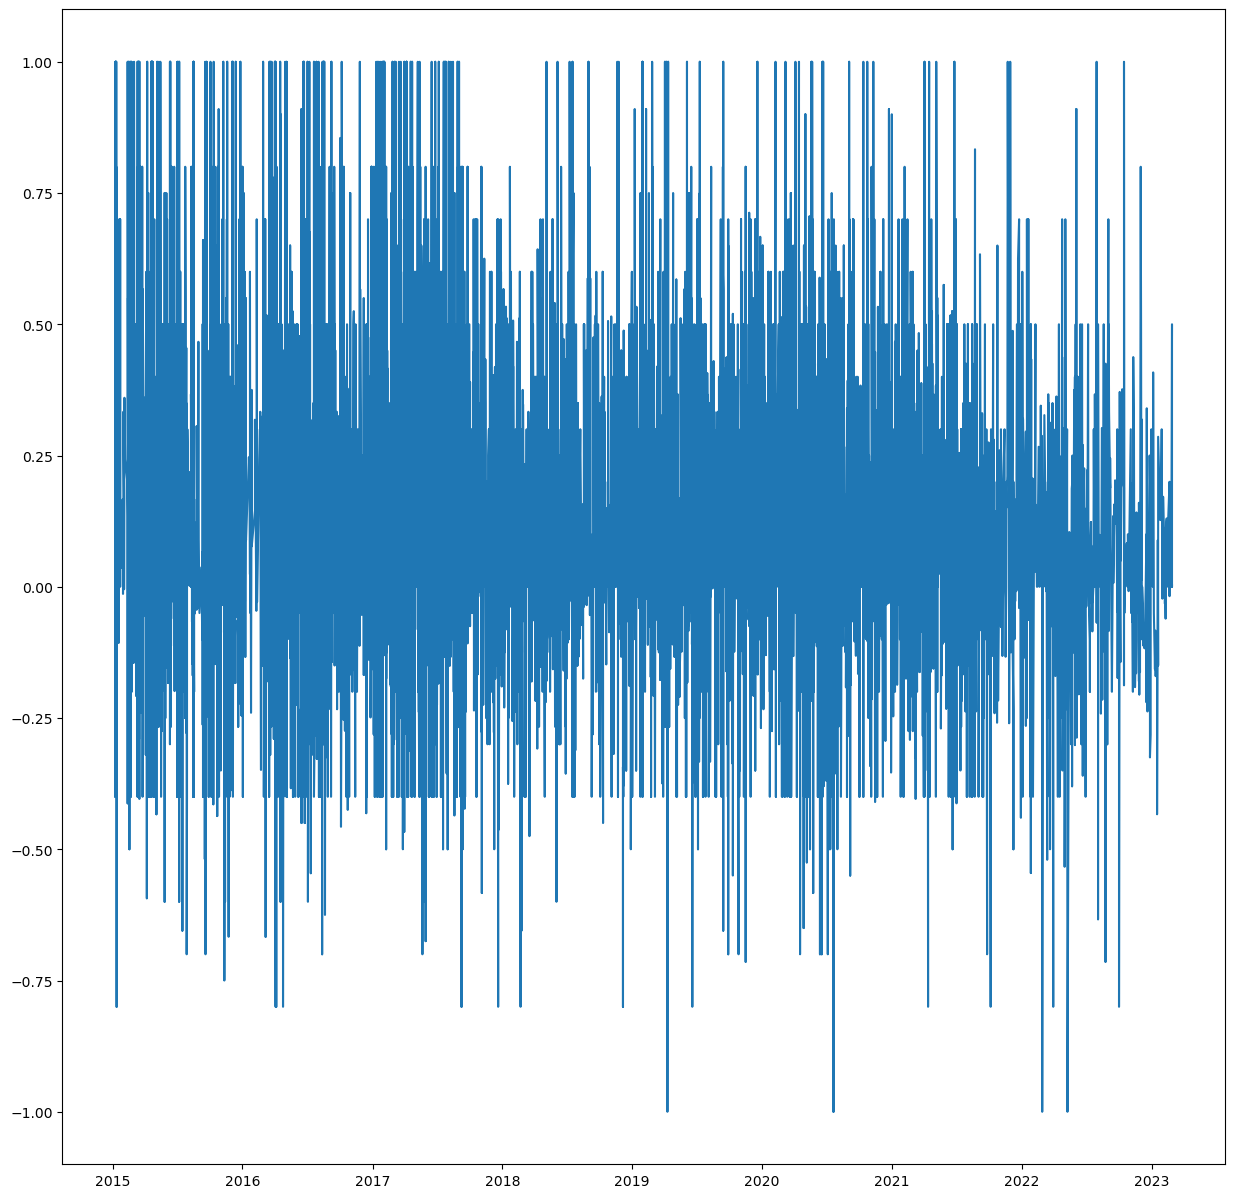

In [130]:
import matplotlib.pyplot as plt

# Convert dates to datetime objects
dates_DML_US_IOS = pd.to_datetime(corpus_DML_US_IOS["Date"])
dates_DC_US_IOS = pd.to_datetime(corpus_DC_US_IOS["Date"])
dates_DV_US_IOS = pd.to_datetime(corpus_DV_US_IOS["Date"])
dates_ML_US_IOS = pd.to_datetime(corpus_ML_US_IOS["Date"])

plt.figure(figsize=(15,15))
plt.plot(dates, polarity)

In [ ]:
corpus


,Country,Rating,Date,Version,Username,Title,Content
0,US,3,2023-02-27,7.2.0,SleepySeas,"Not bad, but not great","Admittedly, this is one of the few games I’ve ..."
1,US,5,2023-02-27,7.2.0,Mишa333,Why,I can’t give a 6 star
2,US,2,2023-02-27,NaN,Momnewbie,Fun if you don’t mind a million ads for every ...,My kids play this on their fire tablets - it’s...
3,US,2,2023-02-25,7.2.0,idk7363,overpriced,idk
4,US,5,2023-02-24,7.2.0,smoochypoo,Great game,"DML is amazing, there is always something to d..."
...,...,...,...,...,...,...,...
10426,US,3,2015-01-08,1.0.1,Skybear17,Hi,Good 😄 this game is a nice time passer
10427,US,5,2015-01-08,1.0.1,Pegacorn of Awesomeness,Tacos are awesome,"Just so you know, I like tacos."
10428,US,5,2015-01-08,1.0.1,Jimmyjr94,Nice,Good game when your bored
10429,US,5,2015-01-08,1.0.1,Sadpanda dragon,Best of the genre,"I have played a lot of breeding games, but I t..."


In [ ]:
import matplotlib.dates as mdates

dates_DML_US_IOS = pd.to_datetime(corpus_DML_US_IOS["Date"])
grouped_dates_DML_US_IOS = group(dates, 10)
grouped_polarity_DML_US_IOS = group(polarity, 10)

nonempty_groups_DML_US_IOS = [group.tolist() for group in grouped_dates if not group.empty]
average_polarity = [np.mean(group) for group in grouped_polarity[:len(nonempty_groups)]]
x_values = [group[-1] for group in nonempty_groups]
update_date = [dt.date(2021,10,12),dt.date(2021,12,8),dt.date(2022,1,18),dt.date(2022,3,1),dt.date(2022,3,30),
dt.date(2022,5,31),dt.date(2022,8,2),dt.date(2022,10,4),dt.date(2022,11,29),dt.date(2023,1,10)]

fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(x_values, average_polarity, color='#079A9A', label='Polarity mean')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.xlim(right=max(x_values), left=dt.date(2021,9,1))


for update_date in update_date:
    ax.axvline(x=update_date, color='#CF5C78', linestyle='--', linewidth=1, label='Uptade')

plt.legend(loc='upper left')
plt.title("Evolution of polarity since 2015 (library TextBlob)")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (838,) and (116,)

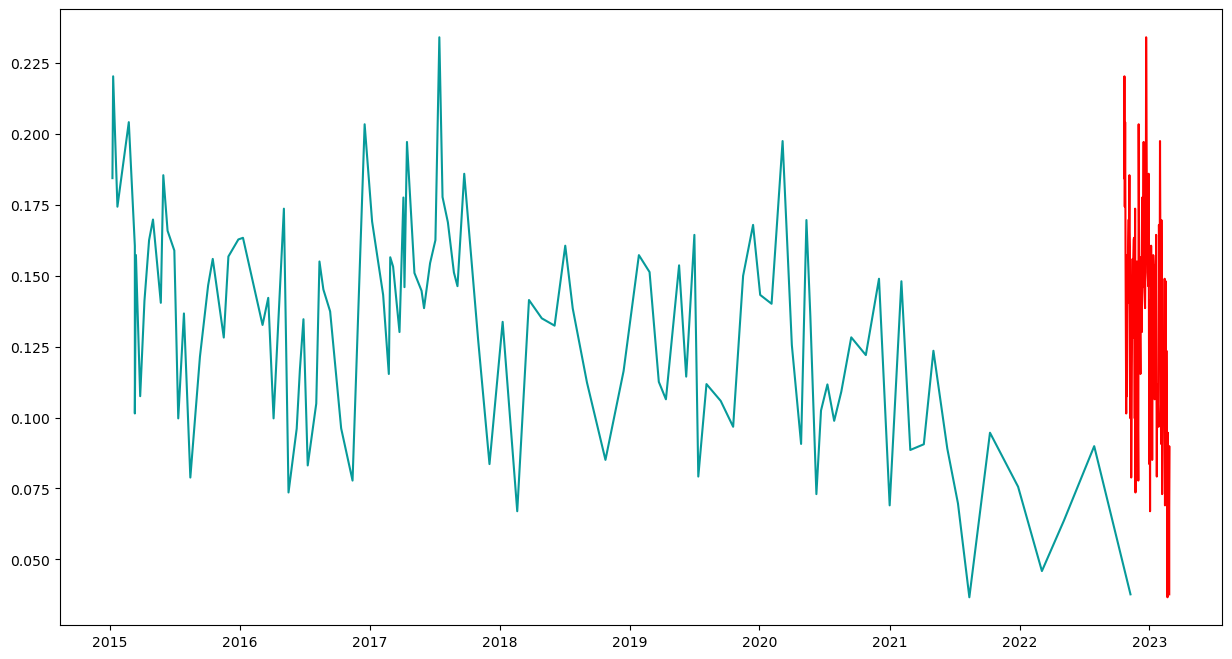

In [143]:
# group = lambda liste, size : [liste[i:i+size] for i in range(0, len(liste), size)]

# polarity_par_paquet = group(polarity,100)
# date_par_paquet = group(dates, 100)

# x_values = [group[-1] for group in date_par_paquet]
# liste_moyennes = []
# for l in polarity_par_paquet :
#   liste_moyennes.append(np.mean(l))

# plt.xlabel('Date')
# plt.ylabel('Average Polarity')
# plt.show()
# plt.plot(x_values,liste_moyennes)

import matplotlib.dates as mdates

n=90

dates_DML_US_IOS = pd.to_datetime(corpus_DML_US_IOS["Date"])
dates_DC_US_IOS = pd.to_datetime(corpus_DC_US_IOS["Date"])
dates_DV_US_IOS = pd.to_datetime(corpus_DV_US_IOS["Date"])
dates_ML_US_IOS = pd.to_datetime(corpus_ML_US_IOS["Date"])

grouped_dates_DML_US_IOS = group(dates_DML_US_IOS, n)
grouped_dates_DC_US_IOS = group(dates_DC_US_IOS, n)
grouped_dates_DV_US_IOS = group(dates_DV_US_IOS, n)
grouped_dates_ML_US_IOS = group(dates_ML_US_IOS, n)

grouped_polarity_DML_US_IOS = group(polarity_DML_US_IOS, n)
grouped_polarity_DC_US_IOS = group(polarity_DC_US_IOS, n)
grouped_polarity_DV_US_IOS = group(polarity_DV_US_IOS, n)
grouped_polarity_ML_US_IOS = group(polarity_ML_US_IOS, n)

nonempty_groups_DML_US_IOS = [group.tolist() for group in grouped_dates_DML_US_IOS if not group.empty]
nonempty_groups_DC_US_IOS = [group.tolist() for group in grouped_dates_DC_US_IOS if not group.empty]
nonempty_groups_DV_US_IOS = [group.tolist() for group in grouped_dates_DV_US_IOS if not group.empty]
nonempty_groups_ML_US_IOS = [group.tolist() for group in grouped_dates_ML_US_IOS if not group.empty]

average_polarity_DML_US_IOS = [np.mean(group) for group in grouped_polarity_DML_US_IOS[:len(nonempty_groups_DML_US_IOS)]]
average_polarity_DC_US_IOS = [np.mean(group) for group in grouped_polarity_DC_US_IOS[:len(nonempty_groups_DC_US_IOS)]]
average_polarity_DV_US_IOS = [np.mean(group) for group in grouped_polarity_DV_US_IOS[:len(nonempty_groups_DV_US_IOS)]]
average_polarity_ML_US_IOS = [np.mean(group) for group in grouped_polarity_ML_US_IOS[:len(nonempty_groups_ML_US_IOS)]]

x_values_DML_US_IOS = [group[-1] for group in nonempty_groups_DML_US_IOS]
x_values_DC_US_IOS = [group[-1] for group in nonempty_groups_DC_US_IOS]
x_values_DV_US_IOS = [group[-1] for group in nonempty_groups_DV_US_IOS]
x_values_ML_US_IOS = [group[-1] for group in nonempty_groups_ML_US_IOS]

fig, ax = plt.subplots(figsize=(15, 8))
x_resized = np.resize(x_values_DC_US_IOS, np.array(average_polarity_DC_US_IOS).shape)
plt.plot(x_resized, average_polarity_DC_US_IOS, color='red', label='DC_US_IOS')
plt.plot(x_values_DML_US_IOS, average_polarity_DML_US_IOS, color='#079A9A',label='DML_US_IOS')
#plt.plot(x_values_DC_US_IOS , average_polarity_DC_US_IOS,color='red',label='DC_US_IOS')
plt.plot(x_values_DV_US_IOS , average_polarity_DV_US_IOS,color='green',label='DV_US_IOS')
plt.plot(x_values_ML_US_IOS , average_polarity_ML_US_IOS,color='purple',label='ML_US_IOS')

plt.xlabel('Date')
plt.ylabel('Average Polarity')
#plt.xlim(right=max(x_values), left=min(x_values))

plt.legend(loc='upper left')
plt.title("Evolution of polarity since 2015 (library TextBlob)")

plt.show()

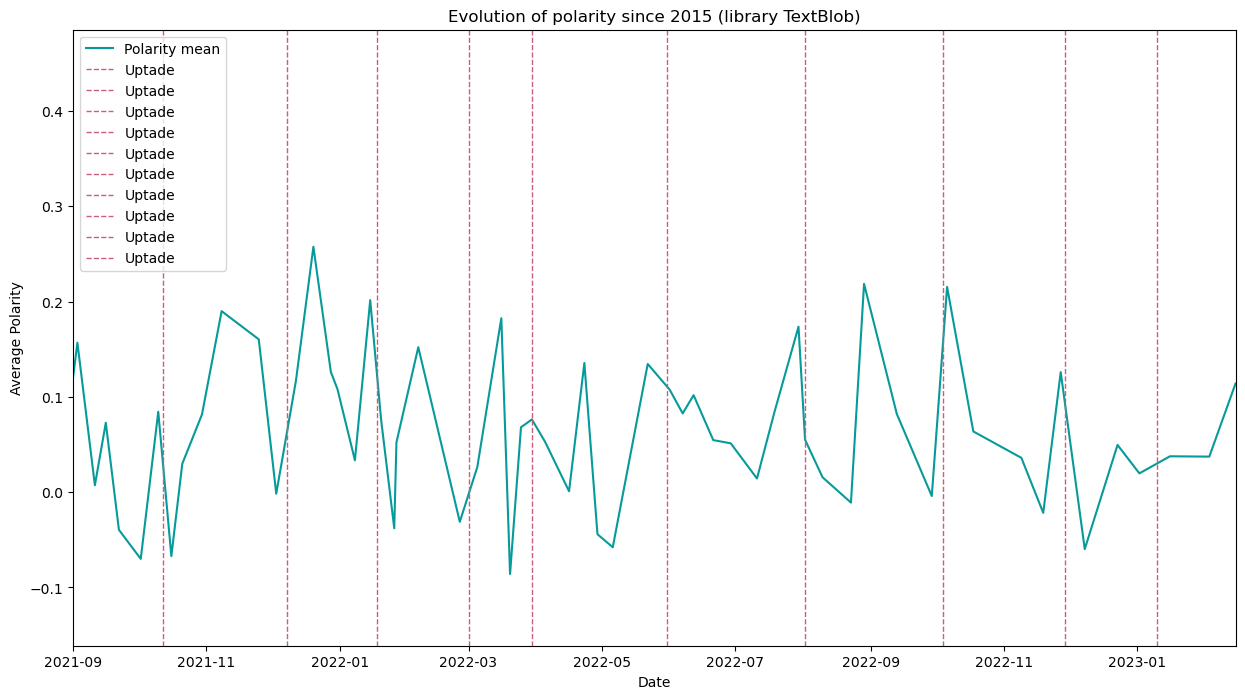

In [110]:
import matplotlib.dates as mdates

grouped_dates = group(dates, 10)
grouped_polarity = group(polarity, 10)

nonempty_groups = [group.tolist() for group in grouped_dates if not group.empty]
average_polarity = [np.mean(group) for group in grouped_polarity[:len(nonempty_groups)]]
x_values = [group[-1] for group in nonempty_groups]
update_date = [dt.date(2021,10,12),dt.date(2021,12,8),dt.date(2022,1,18),dt.date(2022,3,1),dt.date(2022,3,30),
dt.date(2022,5,31),dt.date(2022,8,2),dt.date(2022,10,4),dt.date(2022,11,29),dt.date(2023,1,10)]

fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(x_values, average_polarity, color='#079A9A', label='Polarity mean')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.xlim(right=max(x_values), left=dt.date(2021,9,1))


for update_date in update_date:
    ax.axvline(x=update_date, color='#CF5C78', linestyle='--', linewidth=1, label='Uptade')

plt.legend(loc='upper left')
plt.title("Evolution of polarity since 2015 (library TextBlob)")
plt.show()

In [ ]:
corpus.describe()

,Rating
count,10431.000000
mean,4.312434
std,1.176910
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<AxesSubplot:ylabel='Frequency'>

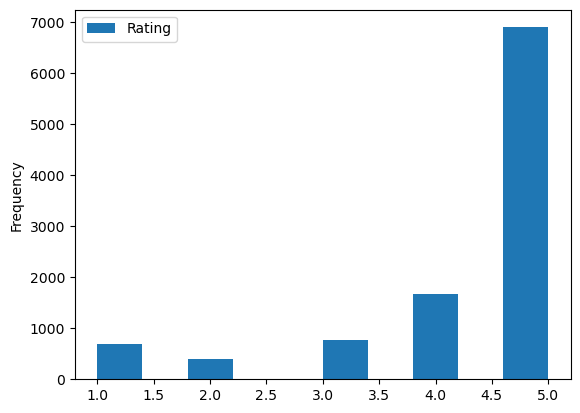

In [ ]:
corpus.plot.hist()

In [ ]:
corpus['content_len'] = corpus["Content"].apply(lambda s: len(s.split()))
corpus['title_len'] = corpus["Title"].apply(lambda s: len(s.split()))
print(corpus)
eval_cols = ["title_len", 'content_len']


      Country  Rating        Date Version                 Username  \
0          US       3  2023-02-27   7.2.0               SleepySeas   
1          US       5  2023-02-27   7.2.0                  Mишa333   
2          US       2  2023-02-27     NaN                Momnewbie   
3          US       2  2023-02-25   7.2.0                  idk7363   
4          US       5  2023-02-24   7.2.0               smoochypoo   
...       ...     ...         ...     ...                      ...   
10426      US       3  2015-01-08   1.0.1                Skybear17   
10427      US       5  2015-01-08   1.0.1  Pegacorn of Awesomeness   
10428      US       5  2015-01-08   1.0.1                Jimmyjr94   
10429      US       5  2015-01-08   1.0.1          Sadpanda dragon   
10430      US       5  2015-01-08   1.0.1                    GlG11   

                                                   Title  \
0                                 Not bad, but not great   
1                                      

      Country  Rating        Date Version                 Username  \
0          US       3  2023-02-27   7.2.0               SleepySeas   
1          US       5  2023-02-27   7.2.0                  Mишa333   
2          US       2  2023-02-27     NaN                Momnewbie   
3          US       2  2023-02-25   7.2.0                  idk7363   
4          US       5  2023-02-24   7.2.0               smoochypoo   
...       ...     ...         ...     ...                      ...   
10426      US       3  2015-01-08   1.0.1                Skybear17   
10427      US       5  2015-01-08   1.0.1  Pegacorn of Awesomeness   
10428      US       5  2015-01-08   1.0.1                Jimmyjr94   
10429      US       5  2015-01-08   1.0.1          Sadpanda dragon   
10430      US       5  2015-01-08   1.0.1                    GlG11   

                                                   Title  \
0                                 Not bad, but not great   
1                                      

<AxesSubplot:xlabel='Rating'>

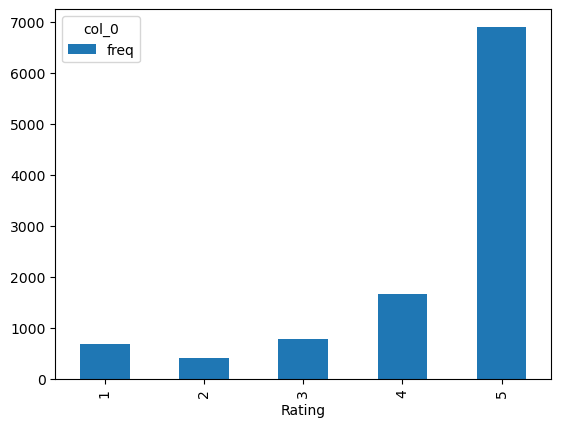

In [ ]:
print(corpus)
t = pd.crosstab(corpus.Rating, "freq")
t.plot.bar()

array([<AxesSubplot:ylabel='freq'>], dtype=object)

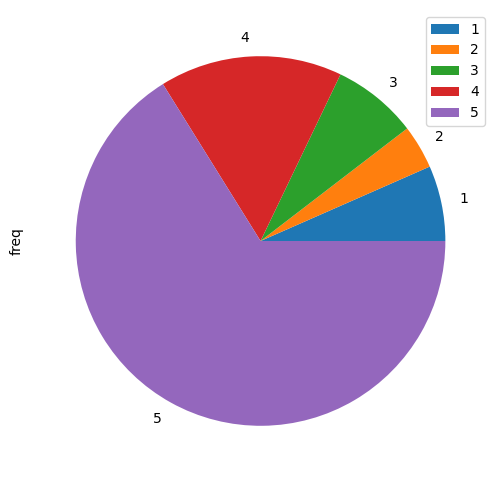

In [ ]:
t = pd.crosstab(corpus.Rating, "freq")
t.plot.pie(subplots=True, figsize = (6, 6))

In [ ]:
pd.scatter_matrix(corpus)

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

In [125]:
n = 50

for i in range(n):
    if corpus["Rating"][i] == 4 :
        t = pd.Series(' '.join(corpus.Content).split()).value_counts()
print(t)

I               14942
the             12868
to              11022
and             10770
game             8754
                ...  
marshmallows        1
marshmallow         1
Cat                 1
happiest            1
tacos.              1
Length: 23384, dtype: int64


In [122]:
pd.Series(np.concatenate([x.split() for x in corpus.Content])).value_counts()

I               14942
the             12868
to              11022
and             10770
game             8754
                ...  
marshmallows        1
marshmallow         1
Cat                 1
happiest            1
tacos.              1
Length: 23384, dtype: int64